In [1]:
'''
What is Bagging?
Instead of trusting one smart student, you ask many average students and take the majority answer.
Thats Bagging
'''

'\nWhat is Bagging?\nInstead of trusting one smart student, you ask many average students and take the majority answer.\nThats Bagging\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
print(data.feature_names , '\n' ,data.target_names)
print(X[0:5 ,])

data.keys()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 
 ['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
pd.DataFrame(X).corr()[0].sort_values(ascending = False)

,0
0,1.000000
2,0.997855
3,0.987357
20,0.969539
22,0.965137
23,0.941082
7,0.822529
27,0.744214
13,0.735864
10,0.679090


In [4]:
def bootstrap_sample(X ,y):
    n_samples = X.shape[0]

    idxs = np.random.choice(n_samples ,n_samples ,replace = True)
    return X[idxs] ,y[idxs]

In [25]:
class Bagging:
    def __init__(self ,base_model ,n_estimators = 10):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.models = []

    def fit(self ,X ,y):
        self.models = []

        for _ in range(self.n_estimators):
            X_sample ,y_sample = bootstrap_sample(X ,y)

            model = self.base_model()
            model.fit(X_sample ,y_sample)

            self.models.append(model)

    def predict(self ,X):
        all_predictions = []

        for model in self.models:
            preds = model.predict(X)
            all_predictions.append(preds)

        all_predictions = np.array(all_predictions)

        n_samples = all_predictions.shape[1]
        final_preds = []

        for i in range(n_samples):
            sample_preds = []
            for j in range(len(self.models)):
                sample_preds.append(all_predictions[j][i])

            count = {}
            for label in sample_preds:
                if label in count:
                    count[label] += 1
                else:
                    count[label] = 1

            max_count = 0
            majority_label = None

            for label in count:
                if count[label] > max_count:
                    max_count = count[label]
                    majority_label = label

            final_preds.append(majority_label)

        return np.array(final_preds)

In [36]:
#Single Tree
single_tree = DecisionTreeClassifier()
single_tree.fit(X_train, y_train)

y_pred_single = single_tree.predict(X_test)
print(accuracy_score(y_test ,y_pred_single))

0.9385964912280702


In [31]:
#Random Forest
tree_bagging = Bagging(
    base_model = DecisionTreeClassifier,
    n_estimators = 15
)

tree_bagging.fit(X_train ,y_train)
y_pred_tree = tree_bagging.predict(X_test)

print(accuracy_score(y_test ,y_pred_tree))

0.956140350877193


In [ ]:
#Bagging with logistic Regression
lr_bagging = Bagging(
    base_model = LogisticRegression,
    n_estimators = 10
)

lr_bagging.fit(X_train, y_train)

y_pred_lr = lr_bagging.predict(X_test)

print("Bagging with Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

In [ ]:
'''
In decision Tree Acc increases noticeably but very small improvment using LR bcz
Decision Trees -> High Variance -> Bagging Helps
Logistic Regression → Low variance → Bagging not very useful
'''

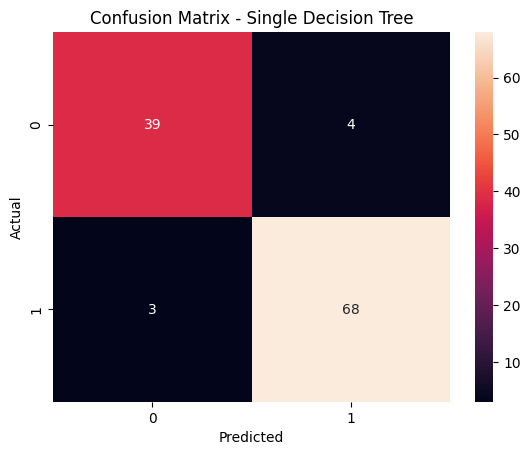

In [39]:
cm_single = confusion_matrix(y_test, y_pred_single)

plt.figure()
sns.heatmap(cm_single, annot=True, fmt="d")
plt.title("Confusion Matrix - Single Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

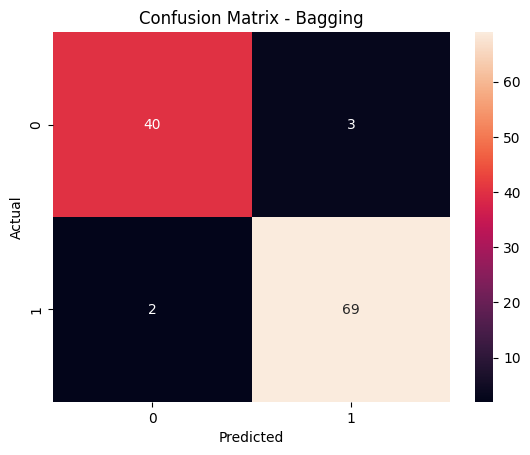

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test ,y_pred_tree)

plt.figure()
sns.heatmap(cm ,annot = True ,fmt = 'd')
plt.title("Confusion Matrix - Bagging")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()